In [106]:
!pip install yfinance
!pip install -U plotly

In [107]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

import plotly.express as px

In [108]:
tikers = ["AAPL", "TGT", "BND","NVDA","F"]
no_of_portfolios=20_000
no_of_asset_classes =5

In [109]:
aapl = yf.download(tikers[0], "2010-01-04", "2019-12-31")
aapl = aapl[["Open", "Close"]]
aapl.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2010-01-04,7.622500,7.643214
2010-01-05,7.664286,7.656429
2010-01-06,7.656429,7.534643


In [110]:
tgt = yf.download(tikers[1], "2010-01-04", "2019-12-31")
tgt = tgt[["Open", "Close"]]
tgt.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2010-01-04,48.470001,48.549999
2010-01-05,48.509998,48.730000
2010-01-06,48.590000,49.660000


In [111]:
bnd = yf.download(tikers[2], "2010-01-01", "2019-12-31")
bnd = bnd[["Open", "Close"]]
bnd.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2009-12-31,78.540001,78.589996
2010-01-04,78.599998,78.680000
2010-01-05,78.889999,78.910004


In [112]:
nvda = yf.download(tikers[3], "2010-01-01", "2019-12-31")
nvda = nvda[["Open", "Close"]]
nvda.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2009-12-31,4.6775,4.6700
2010-01-04,4.6275,4.6225
2010-01-05,4.6050,4.6900


In [113]:
f = yf.download(tikers[4], "2010-01-01", "2019-12-31")
f = f[["Open", "Close"]]
f.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2009-12-31,10.04,10.00
2010-01-04,10.17,10.28
2010-01-05,10.45,10.96


In [114]:
df = pd.concat([aapl, tgt, bnd,nvda,f], axis=1).dropna()
df_col =['AAPL_Open', "AAPL_Close","TGT_Open", "TGT_Close","BND_Open","BND_Close","NVDA_Open",
"NVDA_Close","F_Open","F_Close"]

df.columns=df_col
df


,AAPL_Open,AAPL_Close,TGT_Open,TGT_Close,BND_Open,BND_Close,NVDA_Open,NVDA_Close,F_Open,F_Close
Date,,,,,,,,,,
2010-01-04,7.622500,7.643214,48.470001,48.549999,78.599998,78.680000,4.627500,4.622500,10.17,10.28
2010-01-05,7.664286,7.656429,48.509998,48.730000,78.889999,78.910004,4.605000,4.690000,10.45,10.96
2010-01-06,7.656429,7.534643,48.590000,49.660000,78.970001,78.879997,4.687500,4.720000,11.21,11.37
2010-01-07,7.562500,7.520714,50.200001,50.270000,78.720001,78.820000,4.695000,4.627500,11.46,11.66
2010-01-08,7.510714,7.570714,50.049999,50.070000,78.879997,78.900002,4.590000,4.637500,11.67,11.69
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,70.132500,71.000000,129.470001,128.339996,83.790001,83.699997,60.130001,59.705002,9.50,9.44
2019-12-24,71.172501,71.067497,128.899994,128.550003,83.629997,83.779999,59.549999,59.654999,9.44,9.47
2019-12-26,71.205002,72.477501,129.130005,128.889999,83.820000,83.860001,59.689999,59.797501,9.47,9.45


In [115]:
df_3years = df.loc['2010':'2012',['AAPL_Close','TGT_Close','BND_Close','NVDA_Close','F_Close']]
df_3years

,AAPL_Close,TGT_Close,BND_Close,NVDA_Close,F_Close
Date,,,,,
2010-01-04,7.643214,48.549999,78.680000,4.6225,10.28
2010-01-05,7.656429,48.730000,78.910004,4.6900,10.96
2010-01-06,7.534643,49.660000,78.879997,4.7200,11.37
2010-01-07,7.520714,50.270000,78.820000,4.6275,11.66
2010-01-08,7.570714,50.070000,78.900002,4.6375,11.69
...,...,...,...,...,...
2012-12-24,18.577499,59.540001,83.949997,3.0625,12.40
2012-12-26,18.321428,59.209999,84.019997,3.0600,12.79
2012-12-27,18.395000,58.930000,84.089996,3.0400,12.76


In [116]:
df_3years.loc[:,"AAPL_Close_Returns"] = df_3years.AAPL_Close.pct_change().dropna()

In [117]:
df_3years.loc[:,"TGT_Close_Returns"] = df_3years.TGT_Close.pct_change().dropna()


In [118]:
df_3years.loc[:,"BND_Close_Returns"] = df_3years.BND_Close.pct_change().dropna()


In [119]:

df_3years.loc[:,"NVDA_Close_Returns"] = df_3years.NVDA_Close.pct_change().dropna()

In [120]:
df_3years.loc[:,"F_CLose_Returns"] = df_3years.F_Close.pct_change().dropna()

In [121]:
df_3years =df_3years.drop(columns=['AAPL_Close','TGT_Close','BND_Close','NVDA_Close','F_Close']).dropna()
df_3years

,AAPL_Close_Returns,TGT_Close_Returns,BND_Close_Returns,NVDA_Close_Returns,F_CLose_Returns
Date,,,,,
2010-01-05,0.001729,0.003708,0.002923,0.014603,0.066148
2010-01-06,-0.015906,0.019085,-0.000380,0.006397,0.037409
2010-01-07,-0.001849,0.012284,-0.000761,-0.019597,0.025506
2010-01-08,0.006648,-0.003979,0.001015,0.002161,0.002573
2010-01-11,-0.008821,0.002197,0.000380,-0.014016,0.035928
...,...,...,...,...,...
2012-12-24,0.001617,-0.001007,-0.006744,-0.008097,0.045531
2012-12-26,-0.013784,-0.005543,0.000834,-0.000816,0.031452
2012-12-27,0.004016,-0.004729,0.000833,-0.006536,-0.002346


In [122]:
 matrix_of_return_values=np.asmatrix(df_3years.values)
    

In [123]:
matrix_of_return_values

matrix([[ 0.00172893,  0.00370752,  0.00292328,  0.01460251,  0.06614789],
        [-0.01590632,  0.01908476, -0.00038026,  0.00639653,  0.03740875],
        [-0.00184871,  0.01228354, -0.00076062, -0.0195974 ,  0.02550571],
        ...,
        [ 0.00401563, -0.00472891,  0.00083313, -0.00653594, -0.00234556],
        [-0.01062018, -0.00610895,  0.00023789, -0.00493417,  0.00862066],
        [ 0.04431015,  0.01024413, -0.00095116,  0.01322313,  0.006216  ]])

In [124]:
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights= random_asset_weights / random_asset_weights.sum()
   
    return random_asset_weights

In [125]:
 asset_weights = get_random_asset_weights(no_of_asset_classes)

In [126]:
asset_weights

array([0.18642956, 0.1233495 , 0.25027612, 0.32928933, 0.11065549])

In [127]:
np.cov(matrix_of_return_values, rowvar=False).shape

(5, 5)

In [128]:
matrix_of_return_values.shape

(753, 5)

In [129]:
asset_weights.shape

(5,)

In [130]:
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    
    asset_means = np.array(np.mean(matrix_of_return_values,axis=0)).reshape(-1)
    
    asset_covariances = np.cov(matrix_of_return_values, rowvar=False)
    
    portfolio_mean = np.dot(asset_weights, asset_means)
    
    portfolio_standard_deviation = np.dot(asset_weights.T,
            np.dot(asset_weights, asset_covariances)) ** (0.5)
    
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation 
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [131]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

while len(collection_of_random_asset_weights)< no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    statistic = get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    portfolio_means.append(statistic[0])
    portfolio_standard_deviations.append(statistic[1])
    portfolio_sharpe_ratios.append(statistic[2])


In [132]:
index = np.array(portfolio_sharpe_ratios).argmax()
index

8965

In [133]:
portfolio_sharpe_ratios[index]

0.08491572729351196

In [134]:
portfolio_means[index]

0.0005278990138342031

In [135]:
portfolio_standard_deviations[index]

0.006216740180644223

In [136]:
collection_of_random_asset_weights[index]

array([0.33503926, 0.03036582, 0.59432312, 0.02004726, 0.02022455])

In [137]:
last_date = df_3years.index[-1]
result = pd.DataFrame()
result.loc[last_date, df_3years.columns] = collection_of_random_asset_weights[index]
result.columns = ["AAPL", "TGT", "BND", "NVDA", "F"]
result

,AAPL,TGT,BND,NVDA,F
2012-12-31,0.335039,0.030366,0.594323,0.020047,0.020225


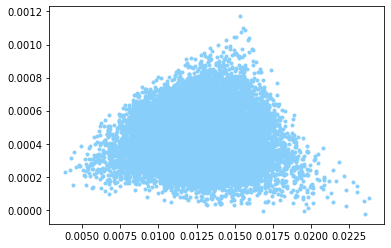

In [138]:
plt.plot(portfolio_standard_deviations, portfolio_means,'o', markersize = 3, color = 'lightskyblue') 
plt.show()